In [ ]:
import numpy as np; import matplotlib.pyplot as plt; import pandas as pd; import seaborn as sns
sns.set_theme(font_scale=2)

In [ ]:
def csvToDf(filename):
    """ returns a pandas dataframe  

    Args:
        filename (_string_): csv-file with energy and magnetization for each cycle
    """
    df = pd.read_csv(filename)
    T = df.temperature.to_numpy()[0]
    L = df.gridsize.to_numpy()[0]
    energy = df.energy
    mag = df.magnetization
    cycles = np.arange(0, len(energy))
    temperature = np.zeros(len(energy))
    temperature[:] = T
    gridsize = np.zeros(len(energy))
    gridsize[:] = L
    energy1mom = np.cumsum(energy)/(cycles + 1)
    energy2mom = np.cumsum(energy**2)/(cycles + 1)
    heatCapacity = 1/(L**2*T**T)*(energy2mom - energy1mom**2)
    mag1mom = np.cumsum(abs(mag))/(cycles + 1)
    mag2mom = np.cumsum(mag**2)/(cycles + 1)
    susceptibility = 1/(L**2*T)*(mag2mom - mag1mom**2)
    df['energy1mom'] = energy1mom
    df['energy2mom'] = energy2mom
    df['magnetization1mom'] = mag1mom
    df['magnetization2mom'] = mag2mom
    df['heatCapacity'] = heatCapacity
    df['susceptibility'] = susceptibility
    df['temperature'] = temperature
    df['gridsize'] = gridsize
    
    return df

    

## Problem 4

In [ ]:
df = csvToDf('validation2x2.csv')
df

In [ ]:
np.mean(abs(df.magnetization**2))

In [ ]:
validation2x2 = csvToDf('validation2x2.csv')
T = np.mean(validation2x2.temperature)
beta = 1/T
Z = 12 + + 4*np.cosh(8*beta)
avgEng = -32*np.sinh(8*beta)/Z
engMom2 = 256*np.cosh(8*beta)/Z
avgM = (16 + 8*np.exp(8*beta))/Z
mMom2 = (32 + 32*np.exp(8*beta))/Z
cV = 64/(T**2)*(1/Z*np.cosh(8*beta) - 4/Z**2*np.sinh(8*beta)**2)
chi = 8*beta*((1 + np.exp(8*beta))/Z - 2*(2 + np.exp(8*beta))**2/Z**2 )


cycles = np.arange(0, len(validation2x2))
fig, axs = plt.subplots(1, 2, figsize = (10, 8))
axs[0].plot(cycles, validation2x2.energy1mom, label = 'Sample values')
axs[0].axhline(avgEng, linestyle = '--', label = 'Theoretical values', color = 'orange')
axs[0].set_xlabel('MC cycles')
axs[0].set_ylabel(r'$\langle E \rangle\; [J]$')
axs[0].set_title('Average energy')


axs[1].plot(cycles, validation2x2.magnetization1mom)
axs[1].axhline(avgM, linestyle = '--', color = 'orange')
axs[1].set_xlabel('MC cycles')
axs[1].set_ylabel(r'$\langle |M| \rangle$')
axs[1].set_title('Average magnetization')
lgd = fig.legend(loc = 'lower center', ncol = 2, fancybox = True, 
        bbox_to_anchor = (0.5, -0.1))
axs[0].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
axs[1].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))

fig.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize = (10, 8))
axs[0].plot(cycles, validation2x2.heatCapacity)
axs[0].axhline(cV, linestyle = '--', color = 'orange')
axs[0].set_xlabel('MC cycles')
axs[0].set_ylabel(r'$C_V\; [k]$')
axs[0].set_ylim([0, 0.3])
axs[0].set_title('Specific heat capacity')

axs[1].plot(cycles, validation2x2.susceptibility, label = 'Sample values')
axs[1].axhline(chi, linestyle = '--', color = 'orange', label = 'Theoretical values')
axs[1].set_xlabel('MC cycles')
axs[1].set_ylabel(r'$\chi\; [k/J]$')
axs[1].set_title('Magnetic susceptibility')
axs[1].set_ylim([0, 0.05])
lgd = fig.legend(loc = 'lower center', ncol = 2, fancybox = True, 
        bbox_to_anchor = (0.5, -0.1))
axs[0].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
axs[1].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))

fig.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize = (10, 8))
axs[0].semilogy(cycles, abs(validation2x2.energy1mom - avgEng))
axs[0].set_xlabel('MC cycles')
axs[0].set_ylabel(r'$\langle E \rangle\; [J]$')
axs[0].set_title('Average energy')


axs[1].semilogy(cycles, abs(validation2x2.magnetization1mom - avgM))
axs[1].set_xlabel('MC cycles')
axs[1].set_ylabel(r'$\langle |M| \rangle$')
axs[1].set_title('Average magnetization')

axs[0].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
axs[1].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))

fig.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize = (10, 8))
axs[0].semilogy(cycles, abs(validation2x2.heatCapacity - cV))
axs[0].set_xlabel('MC cycles')
axs[0].set_ylabel(r'$C_V\; [k]$')
axs[0].set_title('Specific heat capacity')

axs[1].semilogy(cycles, abs(validation2x2.susceptibility - chi))
axs[1].set_xlabel('MC cycles')
axs[1].set_ylabel(r'$\chi\; [k/J]$')
axs[1].set_title('Magnetic susceptibility')

axs[0].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
axs[1].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))

fig.tight_layout()
plt.show()



## Problem 5

In [ ]:
fig1, axs1 = plt.subplots(1, 1, figsize = (10, 8))
fig2, axs2 = plt.subplots(1, 1, figsize = (10, 8))
fig3, axs3 = plt.subplots(1, 1, figsize = (10, 8))
fig4, axs4 = plt.subplots(1, 1, figsize = (10, 8))
filenames = ['ordered1.csv', 'ordered2.csv', 'unordered1.csv', 'unordered2.csv']
names = [r'Ordered at $T = 1.0\; J/k$', r'Ordered at $T = 2.4\; J/k$', r'Unordered at $T = 1.0\; J/k$', r'Unordered at $T = 2.4\; J/k$']
for filename, name in zip(filenames, names):
    df = csvToDf(filename)
    cycles = np.arange(0, len(df))
    
    axs1.plot(cycles, df.energy1mom, label = name)
    axs1.set_xlabel('MC cycles')
    axs1.set_ylabel(r'$\langle E \rangle\; [J]$')
    axs1.set_title('Average energy')
    
    axs2.plot(cycles, df.magnetization1mom, label = name)
    axs2.set_xlabel('MC cycles')
    axs2.set_ylabel(r'$\langle |M| \rangle$')
    axs2.set_title('Average magnetization')
    
    axs3.plot(cycles, df.heatCapacity, label = name)
    axs3.set_xlabel('MC cycles')
    axs3.set_ylabel(r'$C_V\; [k]$')
    axs3.set_title('Specific heat capacity')
    
    axs4.plot(cycles, df.susceptibility, label = name)
    axs4.set_xlabel('MC cycles')
    axs4.set_ylabel(r'$\chi\; [k/J]$')
    axs4.set_title('Magnetic susceptibility')
    
lgd = fig1.legend(loc = 'lower center', ncol = 2, fancybox = True, 
            bbox_to_anchor = (0.5, -0.15))
lgd = fig2.legend(loc = 'lower center', ncol = 2, fancybox = True, 
            bbox_to_anchor = (0.5, -0.15))
lgd = fig3.legend(loc = 'lower center', ncol = 2, fancybox = True, 
            bbox_to_anchor = (0.5, -0.15))
lgd = fig4.legend(loc = 'lower center', ncol = 2, fancybox = True, 
            bbox_to_anchor = (0.5, -0.15))
axs1.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
axs2.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
axs3.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
axs4.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))

fig1.tight_layout()
fig2.tight_layout()
fig3.tight_layout()
fig4.tight_layout()
plt.show()


## Problem 6

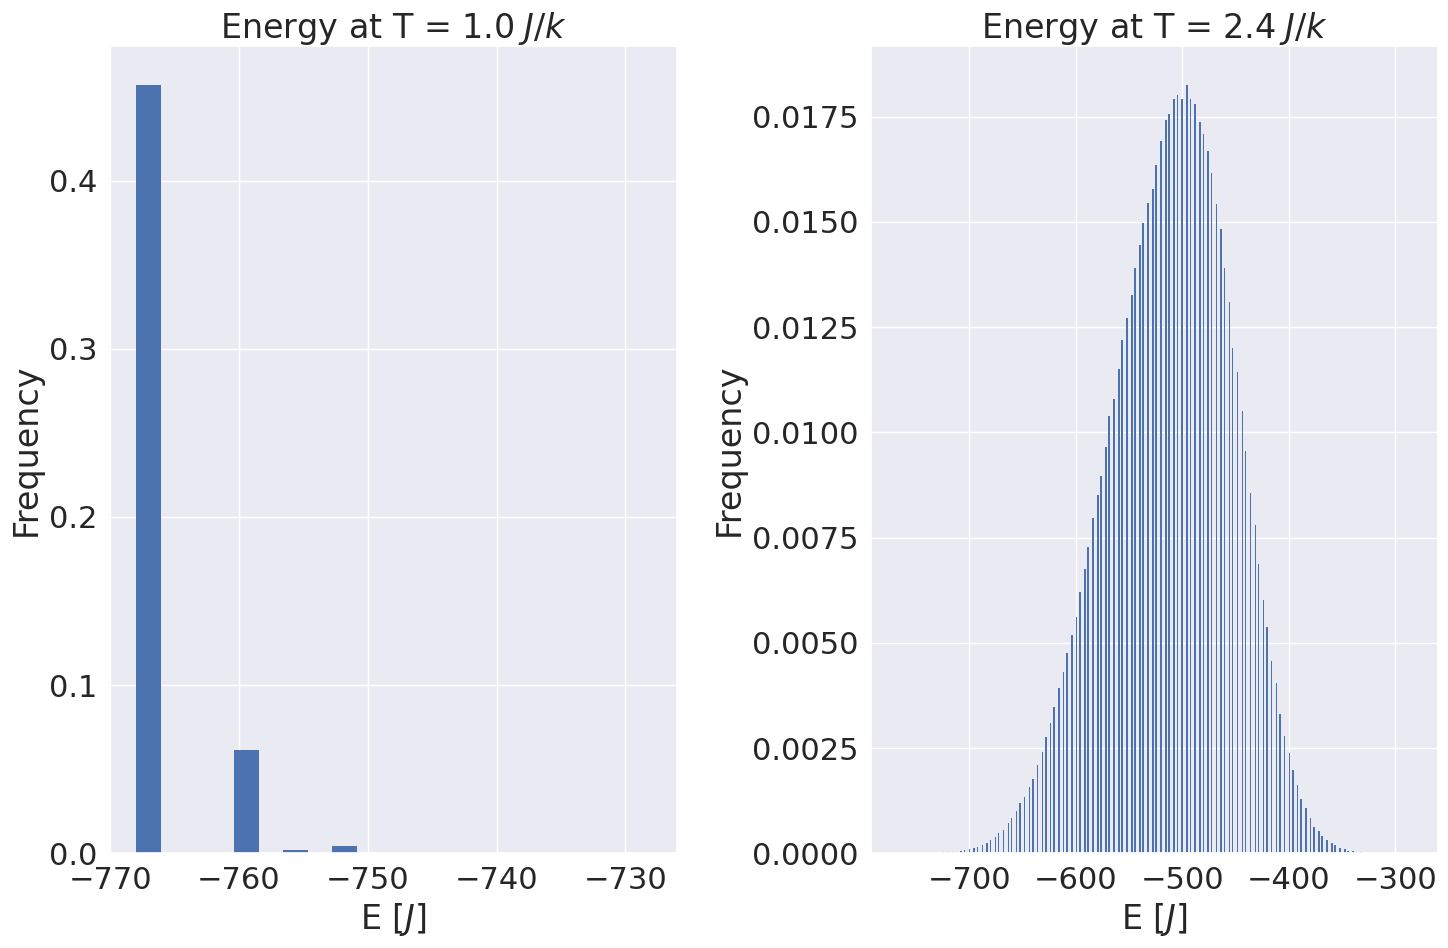

In [66]:
df1 = csvToDf('unordered1.csv') # At T = 1.0
df2 = csvToDf('unordered2.csv') # At T = 2.4
burnInindex = int(0.02*len(df1))
energy1 = df1.energy[burnInindex:]
energy2 = df2.energy[burnInindex:]
fig, axs = plt.subplots(1, 2, figsize = (15, 10))
axs[0].hist(energy1, bins = 'auto', density = True, edgecolor = 'None')
axs[1].hist(energy2, bins = 'auto', density = True, edgecolor = 'None')
axs[0].set_xlabel(r'E $[J]$')
axs[1].set_xlabel(r'E $[J]$')
axs[0].set_ylabel('Frequency')
axs[1].set_ylabel('Frequency')
axs[0].set_title(r'Energy at T = $1.0\; J/k$')
axs[1].set_title(r'Energy at T = $2.4\; J/k$')
fig.tight_layout()
plt.show()

In [ ]:
df2.energy.value_counts()

In [ ]:
df2

In [ ]:
validation2x2